In [39]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("data/heart_attack_risk_dataset.csv")

## EDA

In [41]:
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

In [43]:
df.isnull().sum()

Age                        0
Gender                     0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity_Level    0
BMI                        0
Diabetes                   0
Hypertension               0
Cholesterol_Level          0
Resting_BP                 0
Heart_Rate                 0
Family_History             0
Stress_Level               0
Chest_Pain_Type            0
Thalassemia                0
Fasting_Blood_Sugar        0
ECG_Results                0
Exercise_Induced_Angina    0
Max_Heart_Rate_Achieved    0
Heart_Attack_Risk          0
dtype: int64

In [44]:
x = df.drop("Heart_Attack_Risk", axis=1)
y = df["Heart_Attack_Risk"]

In [45]:
x_str = x.select_dtypes(include="object")
x_num = x.select_dtypes(exclude="object")
x_str = pd.get_dummies(x_str, drop_first=True)
x = pd.concat([x_num, x_str], axis=1)

In [46]:
values = y.unique()
values_dict = {v: k for k, v in enumerate(values)}
y = y.map(arg=values_dict)

In [47]:
new_df = pd.concat([x, y], axis=1)

In [48]:
new_df.head()

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,...,Stress_Level_Low,Stress_Level_Moderate,Chest_Pain_Type_Atypical,Chest_Pain_Type_Non-anginal,Chest_Pain_Type_Typical,Thalassemia_Normal,Thalassemia_Reversible defect,ECG_Results_Normal,ECG_Results_ST-T abnormality,Heart_Attack_Risk
0,69,1,0,34.61,1,0,152.1,171,85,0,...,False,True,False,True,False,False,True,True,False,0
1,32,0,0,22.75,0,0,166.8,126,103,0,...,True,False,False,False,False,True,False,False,True,1
2,89,0,1,35.32,0,0,272.3,123,127,0,...,True,False,False,False,True,False,True,False,True,0
3,78,0,1,18.23,1,0,237.7,144,125,0,...,True,False,False,False,True,False,False,False,False,0
4,38,1,0,19.82,0,0,207.7,123,107,0,...,False,False,False,False,False,False,True,False,True,1


In [49]:
new_df.describe()

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Fasting_Blood_Sugar,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,53.398700,0.298420,0.401980,27.519357,0.198840,0.29738,225.036444,134.434100,94.530480,0.30034,0.149360,0.201640,149.305340,0.700960
std,20.799006,0.457569,0.490303,7.225176,0.399131,0.45711,43.317373,25.907961,20.187124,0.45841,0.356447,0.401229,28.823699,0.782628
min,18.000000,0.000000,0.000000,15.000000,0.000000,0.00000,150.000000,90.000000,60.000000,0.00000,0.000000,0.000000,100.000000,0.000000
25%,35.000000,0.000000,0.000000,21.270000,0.000000,0.00000,187.300000,112.000000,77.000000,0.00000,0.000000,0.000000,124.000000,0.000000
50%,53.000000,0.000000,0.000000,27.540000,0.000000,0.00000,225.100000,134.000000,94.000000,0.00000,0.000000,0.000000,149.000000,0.000000
75%,71.000000,1.000000,1.000000,33.770000,0.000000,1.00000,262.600000,157.000000,112.000000,1.00000,0.000000,0.000000,174.000000,1.000000
max,89.000000,1.000000,1.000000,40.000000,1.000000,1.00000,300.000000,179.000000,129.000000,1.00000,1.000000,1.000000,199.000000,2.000000


In [50]:
new_df.corr()

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,...,Stress_Level_Low,Stress_Level_Moderate,Chest_Pain_Type_Atypical,Chest_Pain_Type_Non-anginal,Chest_Pain_Type_Typical,Thalassemia_Normal,Thalassemia_Reversible defect,ECG_Results_Normal,ECG_Results_ST-T abnormality,Heart_Attack_Risk
Age,1.000000,-0.010123,-0.000250,0.006035,-0.001944,-0.001635,-0.000650,0.003387,-0.004448,-0.001106,...,-0.006532,0.006058,0.006908,-0.000572,-0.002481,-0.004558,-0.003701,0.005172,0.000516,0.000693
Smoking,-0.010123,1.000000,0.001877,-0.002649,-0.003164,-0.000689,-0.004103,-0.004969,-0.004322,-0.001561,...,-0.002426,-0.003221,-0.002659,0.004064,-0.000063,-0.001995,0.000283,0.001374,0.000203,0.004299
Alcohol_Consumption,-0.000250,0.001877,1.000000,0.000199,-0.001174,-0.001342,-0.003098,0.004930,0.002849,0.001287,...,0.000786,0.002460,-0.006853,0.003411,0.001330,-0.000869,0.003510,-0.004997,-0.001536,0.004921
BMI,0.006035,-0.002649,0.000199,1.000000,-0.000062,0.001564,0.005346,-0.000864,-0.009769,-0.001644,...,-0.005468,0.002808,0.003040,-0.003341,0.003823,-0.001366,-0.002523,0.006477,-0.006110,-0.000665
Diabetes,-0.001944,-0.003164,-0.001174,-0.000062,1.000000,-0.001157,0.000933,0.007476,0.004813,0.001751,...,-0.000878,-0.001426,0.005729,-0.001791,-0.004696,-0.008585,0.004586,0.008454,-0.003839,0.004870
Hypertension,-0.001635,-0.000689,-0.001342,0.001564,-0.001157,1.000000,-0.003229,-0.005184,-0.002080,-0.001217,...,-0.000359,-0.007165,-0.000946,-0.004011,0.005791,-0.010847,-0.001354,0.006143,-0.006176,-0.006405
Cholesterol_Level,-0.000650,-0.004103,-0.003098,0.005346,0.000933,-0.003229,1.000000,-0.008222,-0.003920,-0.000360,...,0.001255,-0.001301,0.007228,-0.007917,-0.002581,-0.001534,0.001342,-0.002037,-0.005781,0.002882
Resting_BP,0.003387,-0.004969,0.004930,-0.000864,0.007476,-0.005184,-0.008222,1.000000,-0.003167,0.000962,...,0.000654,-0.003515,0.004712,-0.001846,0.000503,-0.007724,0.006388,0.001192,-0.003436,-0.006178
Heart_Rate,-0.004448,-0.004322,0.002849,-0.009769,0.004813,-0.002080,-0.003920,-0.003167,1.000000,0.005893,...,-0.007711,0.008460,0.006045,0.000162,0.001308,-0.000926,0.000916,-0.004867,-0.005262,0.006851
Family_History,-0.001106,-0.001561,0.001287,-0.001644,0.001751,-0.001217,-0.000360,0.000962,0.005893,1.000000,...,-0.005370,0.000978,-0.000831,-0.003500,-0.002901,-0.001461,-0.001200,0.000886,-0.002015,0.001934


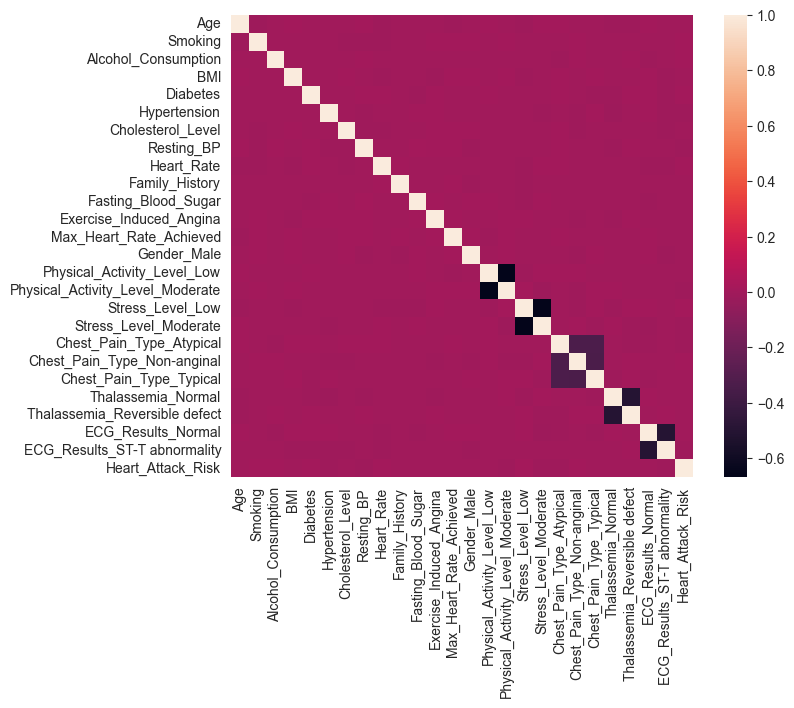

In [51]:
data = new_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data=data, square=True)
plt.show()